# Welcome on board everyone 💅

Hello, hello, hello!

This notebook presents a data analysis project focused on salaries for data science jobs in 2025. It guides you through essential steps, including data preprocessing, data cleaning, insightful data analysis, and compelling data visualization.

A key point to note is that the data used for most of the analysis is specifically filtered for the year 2025. This means it represents a partial-year dataset. Additionally, I've prioritized creating reusable functions throughout, allowing you to easily adapt and apply them for your own interests.

I hope you have fun exploring my project and find it insightful!

I appreciate your engagement! :)

# Import libralies

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/salaries-for-data-science-jobs/salaries.json
/kaggle/input/salaries-for-data-science-jobs/salaries.csv


# Read the data file

In [2]:
def show_df(filepath):
    """reads a csv file and displays Dataframe"""
    df = pd.read_csv(filepath)
    return df

filepath = "/kaggle/input/salaries-for-data-science-jobs/salaries.csv"
df = show_df(filepath)
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
99585,2024,MI,FT,Site Reliability Engineer,137750,USD,137750,US,0,US,M
114559,2024,SE,FT,Machine Learning Engineer,168000,USD,168000,US,0,US,M
47359,2025,MI,FT,Data Scientist,75600,USD,75600,US,0,US,M
65941,2024,MI,FT,Manager,130000,USD,130000,US,0,US,M
134707,2023,SE,FT,Data Architect,115000,USD,115000,US,100,US,M


# Get overview of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


In [4]:
df.shape

(136757, 11)

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.duplicated().sum()

70694

## Get unique values in a column

In [10]:
def unique_values(dataframe, column_name):
    """
    Returns the unique values in a given column, with formatting for string values.
    
    Parameters:
    - dataframe: pandas DataFrame
    - column_name: string name of the column to analyze
    
    Returns:
    - List of unique values
    """
    if dataframe[column_name].dtype == 'string':
        cleaned_col = dataframe[column_name].str.strip().str.upper()
    else:
        cleaned_col = dataframe[column_name]

    unique_vals = cleaned_col.unique()

    print(f"Unique values in '{column_name}':")
    print(unique_vals)
    print(f"Total: {len(unique_vals)} unique values\n")

    return unique_vals

In [11]:
unique_values(df, 'work_year')
unique_values(df, 'experience_level')
unique_values(df, 'salary_currency')
unique_values(df, 'company_location')
unique_values(df, 'company_size')
unique_values(df, 'remote_ratio')

Unique values in 'work_year':
[2025 2024 2022 2023 2020 2021]
Total: 6 unique values

Unique values in 'experience_level':
['MI' 'SE' 'EN' 'EX']
Total: 4 unique values

Unique values in 'salary_currency':
['USD' 'EUR' 'GBP' 'CAD' 'MXN' 'PLN' 'CHF' 'PHP' 'JPY' 'INR' 'SGD' 'HUF'
 'AUD' 'TWD' 'NOK' 'BRL' 'CZK' 'ZAR' 'DKK' 'ILS' 'TRY' 'SEK' 'NZD' 'HKD'
 'THB' 'CLP']
Total: 26 unique values

Unique values in 'company_location':
['US' 'CA' 'AT' 'LV' 'GB' 'PT' 'FI' 'AU' 'NZ' 'SK' 'IE' 'ES' 'DE' 'NL'
 'PL' 'FR' 'BR' 'ZA' 'AR' 'CO' 'MX' 'UA' 'CH' 'LT' 'PH' 'BE' 'TH' 'JM'
 'JP' 'MT' 'MK' 'SI' 'HK' 'LS' 'IN' 'PE' 'SG' 'IT' 'HU' 'RO' 'PA' 'EE'
 'LU' 'DZ' 'EG' 'CL' 'GR' 'KE' 'CD' 'SE' 'KR' 'TW' 'NO' 'CZ' 'TR' 'CY'
 'DK' 'AE' 'BG' 'ID' 'JO' 'RS' 'PR' 'SV' 'EC' 'DO' 'MY' 'XK' 'CR' 'ZM'
 'AM' 'IL' 'LB' 'NG' 'HR' 'PK' 'HN' 'VE' 'AS' 'SA' 'OM' 'BA' 'VN' 'GI'
 'MU' 'RU' 'QA' 'GH' 'AD' 'CF' 'IR' 'BS' 'IQ' 'CN' 'MD']
Total: 95 unique values

Unique values in 'company_size':
['M' 'L' 'S']
Total: 3 unique va

array([100,   0,  50])

In [12]:
df["company_location"].value_counts().head(10)

company_location
US    122633
CA      5442
GB      3807
AU       530
NL       414
DE       399
FR       376
LT       340
AT       305
ES       269
Name: count, dtype: int64

# Data Preprocessing

In [13]:
def preprocess(filename = filepath):
    """prepares and transforms dataframe"""

    # change data types
    dtype_mapper = {"experience_level" : "string",
                    "employment_type" : "string",
                    "job_title" : "string",
                    "salary_currency" : "string",
                    "employee_residence" : "string",
                    "company_location" : "string",
                    "company_size" : "string"}
    
    # read the data file
    df = (pd.read_csv(filename, dtype=dtype_mapper)
        .drop("salary", axis = 1))

    # Standardizes currency values
    df["salary_currency"] = df["salary_currency"].str.strip().str.upper()

    # Keeps only rows where currency is USD
    df = df[df["salary_currency"] == "USD"]

    # removes duplicated rows
    df = df.drop_duplicates()

    return df
    
filepath = "/kaggle/input/salaries-for-data-science-jobs/salaries.csv"
sa = preprocess()
sa.sample(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
12040,2025,SE,FT,Full Stack Engineer,USD,180000,US,0,US,M
4317,2025,MI,FT,Engineer,USD,287100,US,100,US,M
73835,2024,SE,FT,Data Engineer,USD,178750,US,0,US,M


In [14]:
# recheck data type and duplicated rows
sa.info()
print(f"There are {sa.duplicated().sum()} of duplicated rows")

<class 'pandas.core.frame.DataFrame'>
Index: 60623 entries, 0 to 136755
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           60623 non-null  int64 
 1   experience_level    60623 non-null  string
 2   employment_type     60623 non-null  string
 3   job_title           60623 non-null  string
 4   salary_currency     60623 non-null  string
 5   salary_in_usd       60623 non-null  int64 
 6   employee_residence  60623 non-null  string
 7   remote_ratio        60623 non-null  int64 
 8   company_location    60623 non-null  string
 9   company_size        60623 non-null  string
dtypes: int64(3), string(7)
memory usage: 5.1 MB
There are 0 of duplicated rows


In [15]:
sa.shape

(60623, 10)

# The Main Reveal 🎬

## General Descriptive Insights

## 1. Top 10 average highest and lowest paid data science jobs in 2025 (globally) 🌏

In [16]:
def paid_summary(dataframe, top_n = 10, ascending=False):
    """
    Sorts a salary summary DataFrame by a specified column and prints the top N job titles.
    Args:
        df_summary (pd.DataFrame): The DataFrame containing aggregated county data
                                   (e.g., from a groupby.sum()).
        column_name (str): The name of the column to sort by.
        top_n (int, optional): The number of top records to display. Defaults to 10.
    """
    # Keeps only work_year == 2025
    df_2025 = dataframe[dataframe["work_year"] == 2025]
    
    salary_summary = df_2025.groupby("job_title")["salary_in_usd"].mean().round(2)
    sorted_df = salary_summary.sort_values(ascending = ascending)

    # Display result
    label = "lowest" if ascending else "highest"
    print(f"\nTop {top_n} {label} paid job titles in USD for 2025:")
    print(sorted_df.head(top_n).to_string())

In [17]:
paid_summary(sa, top_n=10, ascending=False)
paid_summary(sa, top_n=10, ascending=True)


Top 10 highest paid job titles in USD for 2025:
job_title
Research Team Lead                450000.00
Head of Applied AI                278500.00
Director of Data                  277500.00
Head of AI                        267901.29
Director of Machine Learning      261650.00
Director of Product Management    261555.25
Head of Data                      253078.14
Enterprise Account Executive      249416.67
Engineering Manager               248182.32
Head of Machine Learning          247750.00

Top 10 lowest paid job titles in USD for 2025:
job_title
Clinical Data Operator      36000.00
Clinical Aide               37333.33
AI Content Writer           40506.67
Data Operator               42000.00
Data Integration Analyst    49000.00
Research Assistant          49662.78
Admin & Data Analyst        52000.00
Data & Analytics Analyst    55000.00
Trainee                     55000.00
Cientista de Dados          60000.00


## 2. Top 10 average highest and lowest paid data science jobs in 2025 (USA) 🇺🇸

In [18]:
def paid_summary(dataframe, headquater, top_n = 10, ascending=False):
    """
    Sorts a salary summary DataFrame by a specified column and prints the top N job titles.
    Args:
        df_summary (pd.DataFrame): The DataFrame containing aggregated county data
                                   (e.g., from a groupby.sum()).
        column_name (str): The name of the column to sort by.
        top_n (int, optional): The number of top records to display. Defaults to 10.
    """
    # Keeps only work_year == 2025 & company_location == US
    df_2025 = dataframe[
                (dataframe["work_year"] == 2025) & 
                (dataframe["company_location"] == headquater)]    
    
    salary_summary = df_2025.groupby("job_title")["salary_in_usd"].mean().round(2)
    sorted_df = salary_summary.sort_values(ascending = ascending)

    # Display result
    label = "lowest" if ascending else "highest"
    print(f"\nTop {top_n} {label} paid job titles in USD for 2025 (Location: {headquater}):")
    print(sorted_df.head(top_n).to_string())

In [19]:
paid_summary(sa, "US", top_n=10, ascending = False)
paid_summary(sa, "US", top_n=10, ascending = True)


Top 10 highest paid job titles in USD for 2025 (Location: US):
job_title
Research Team Lead                450000.00
Director of Data                  277500.00
Director of Product Management    263819.06
Director of Machine Learning      261650.00
Head of AI                        260331.11
Head of Applied AI                260000.00
Head of Data                      255558.21
Engineering Manager               250508.53
Head of Machine Learning          247750.00
Machine Learning Architect        246320.00

Top 10 lowest paid job titles in USD for 2025 (Location: US):
job_title
Clinical Data Operator       36000.00
Clinical Aide                37333.33
AI Content Writer            40506.67
Data Operator                42000.00
Data Integration Analyst     49000.00
Research Assistant           51097.34
Admin & Data Analyst         52000.00
Trainee                      55000.00
Data Integrity Specialist    64000.00
Data Scientist Associate     70000.00


## 3. Top 10 average highest and lowest paid data science jobs in 2025 (UK) 🇬🇧

In [20]:
paid_summary(sa, "GB", top_n=10, ascending = False)
paid_summary(sa, "GB", top_n=10, ascending = True)


Top 10 highest paid job titles in USD for 2025 (Location: GB):
job_title
Data Analysis                218000.0
Systems Engineer             215000.0
Manager                      204037.5
Machine Learning Engineer    204000.0
Quant Options Trader         200000.0
Research Scientist           190500.0
AI Lead                      186550.0
Data Architect               183350.0
Sales Engineer               180000.0
Software Engineer            175000.0

Top 10 lowest paid job titles in USD for 2025 (Location: GB):
job_title
AI Programmer       75000.00
Associate           80000.00
Data Analyst       100401.00
AI Engineer        106666.67
Director           112827.50
Data Integrator    123800.00
Analyst            132805.67
Engineer           155958.62
Data Scientist     162000.00
Data Engineer      175000.00


## 4. Average salary for each experience level

- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level
- EX: Executive / Director

In [21]:
def avg_salary_by_experience(dataframe, year=None, country=None):
    """
    Returns average salary in USD grouped by experience level.

    Parameters:
    - dataframe (pd.DataFrame): Your salary DataFrame
    - year (int, optional): Filter for a specific year
    - country (str, optional): Filter for a specific company location (e.g., "US")
    """
    df_filtered = dataframe.copy()

    # Filter by year
    if year is not None:
        df_filtered = df_filtered[df_filtered["work_year"] == year]

    # Filter by country
    if country is not None:
        df_filtered = df_filtered[df_filtered["company_location"] == country]

    result = (df_filtered
              .groupby("experience_level")["salary_in_usd"]
              .mean()
              .round(2)
              .sort_values(ascending=False)
             )

    print(f"\nAverage salary by experience level" +
          (f" in {country}" if country else "") +
          (f" for {year}" if year else "") + ":\n")

    return result

## 5. Average salary for each experience level (Globally) 🌏

In [22]:
avg_salary_by_experience(sa, year=2025)


Average salary by experience level for 2025:



experience_level
EX    205033.77
SE    173685.34
MI    143048.63
EN    104350.90
Name: salary_in_usd, dtype: float64

## 6. Average salary for each experience level (US) 🇺🇸

In [23]:
avg_salary_by_experience(sa, year=2025, country="US")


Average salary by experience level in US for 2025:



experience_level
EX    204762.98
SE    176754.95
MI    145666.78
EN    107010.13
Name: salary_in_usd, dtype: float64

## 7. Average salary for each experience level (GB) 🇬🇧

In [36]:
avg_salary_by_experience(sa, year=2025, country="GB")


Average salary by experience level in GB for 2025:



experience_level
MI    185793.75
EX    169172.40
SE    150408.67
EN     97950.73
Name: salary_in_usd, dtype: float64

## 8. Job Title Trends

**Most common jobs**

In [37]:
def most_common_jobs(dataframe, top_n=10):
    """Returns the most common job titles and their counts."""
    
    job_counts = dataframe["job_title"].value_counts().head(top_n)
    
    print(f"\nTop {top_n} most common job titles:")
    
    return job_counts

In [38]:
most_common_jobs(sa, top_n=10)


Top 10 most common job titles:


job_title
Data Scientist               6127
Data Engineer                5869
Data Analyst                 5313
Software Engineer            4276
Engineer                     3789
Manager                      3175
Machine Learning Engineer    3073
Analyst                      2340
Research Scientist           1242
Product Manager              1185
Name: count, dtype: Int64

## 9. Average salary for most common jobs

In [39]:
def avg_salary_for_common_jobs(dataframe, top_n=10):
    """Shows average salary of the most common job titles."""
    
    common_jobs = dataframe["job_title"].value_counts().head(top_n).index.tolist()

    avg_salary = (dataframe[dataframe["job_title"].isin(common_jobs)]
                  .groupby("job_title")["salary_in_usd"]
                  .mean()
                  .round(2)
                  .sort_values(ascending=False))

    print(f"\nAverage salaries for the top {top_n} most common job titles:")
    
    return avg_salary

In [40]:
avg_salary_for_common_jobs(sa, top_n=10)


Average salaries for the top 10 most common job titles:


job_title
Machine Learning Engineer    196635.96
Research Scientist           194653.14
Product Manager              189895.04
Software Engineer            183641.10
Manager                      171612.25
Engineer                     170282.00
Data Scientist               160137.43
Data Engineer                154884.28
Analyst                      116616.32
Data Analyst                 110956.68
Name: salary_in_usd, dtype: float64

## 10. Career entry advice

In [41]:
def job_entry(dataframe, year=None, country=None, top_n=10):
    """Returns top N best-paying entry-level jobs by average salary."""

    df_filtered = dataframe.copy()

    # Filter only entry-level jobs
    df_filtered = df_filtered[df_filtered["experience_level"] == "EN"]

    # Filter by year
    if year is not None:
        df_filtered = df_filtered[df_filtered["work_year"] == year]

    # Filter by company location
    if country is not None:
        df_filtered = df_filtered[df_filtered["company_location"] == country]

    # Group by job title and calculate average salary
    job_avg_salary = (df_filtered
                      .groupby("job_title")["salary_in_usd"]
                      .mean()
                      .round(2)
                      .sort_values(ascending=False)
                      .head(top_n))

    print(f"\nTop {top_n} best-paying entry-level jobs" +
          (f" in {country}" if country else "") +
          (f" for {year}" if year else "") + ":\n")

    return job_avg_salary


In [42]:
# Global (all years)
job_entry(sa, top_n=10)


Top 10 best-paying entry-level jobs:



job_title
Engineering Manager                350933.33
Head of Data                       240500.00
Algorithm Developer                212500.00
AI Researcher                      207231.11
Director                           204718.00
Software Architect                 190000.00
Quantitative Researcher            186666.67
Research Scientist                 183130.00
Machine Learning Model Engineer    180000.00
Researcher                         177750.00
Name: salary_in_usd, dtype: float64

In [43]:
# recheck for correctness
df_filtered = sa.copy()
sa[(sa["job_title"] == "Engineering Manager") & (sa["experience_level"] == "EN")].sample(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
51294,2025,EN,FT,Engineering Manager,USD,242000,US,0,US,M
20766,2025,EN,FT,Engineering Manager,USD,385000,US,100,US,M
51295,2025,EN,FT,Engineering Manager,USD,193600,US,0,US,M


In [44]:
# In the US, in 2025
job_entry(sa, year=2025, country="US", top_n=10)


Top 10 best-paying entry-level jobs in US for 2025:



job_title
Engineering Manager        350933.33
Head of Data               240500.00
Algorithm Developer        212500.00
Director                   204718.00
AI Researcher              200846.67
Research Engineer          193986.75
Quantitative Researcher    192500.00
Software Architect         190000.00
Research Scientist         183069.10
Researcher                 177750.00
Name: salary_in_usd, dtype: float64

In [45]:
# recheck for correctness
df_filtered = sa.copy()
sa[(sa["job_title"] == "Data Analytics Manager") & (sa["experience_level"] == "EN")].sample(3)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
43241,2025,EN,FT,Data Analytics Manager,USD,158000,US,0,US,M
43240,2025,EN,FT,Data Analytics Manager,USD,190000,US,0,US,M
124763,2024,EN,FT,Data Analytics Manager,USD,27000,IN,100,AS,M


## 11. Job Salary and remote ratio

In [46]:
def salary_remote(dataframe, ratio_rate, year=None, country=None, top_n=10):
    """
    Sorts a county summary DataFrame by a specified column and prints the top N counties.
    """

    df_ratio_sal = dataframe.copy()

    # Filter by remote ratio
    df_ratio_sal = df_ratio_sal[df_ratio_sal["remote_ratio"] == ratio_rate]

    # Filter by year
    if year is not None:
        df_ratio_sal = df_ratio_sal[df_ratio_sal["work_year"] == year]

    # Filter by company location
    if country is not None:
        df_ratio_sal = df_ratio_sal[df_ratio_sal["company_location"] == country]

    # Group by job title and calculate average salary
    job_avg_salary = (df_ratio_sal
                      .groupby("job_title")["salary_in_usd"]
                      .mean()
                      .round(2)
                      .sort_values(ascending=False)
                      .head(top_n))

    print(f"\nTop {top_n} best-paying jobs" +
          (f" in {country}" if country else "") +
            (f" remote ratio {ratio_rate}" if ratio_rate else "") + ":\n")

    return job_avg_salary

**Top 10 Highest paid data science jobs with 100 remote working (Globally)**

In [47]:
salary_remote(sa, ratio_rate = 100, year = 2025, top_n=10)


Top 10 best-paying jobs remote ratio 100:



job_title
Principal Researcher              380000.00
Director of Machine Learning      297037.50
Head of Applied AI                287750.00
Head of AI                        276250.00
Head of Data                      265543.56
Director of Product Management    260000.00
Enterprise Account Executive      253166.67
Engineering Manager               239818.42
Data Operations Lead              220000.00
Executive                         218628.92
Name: salary_in_usd, dtype: float64

**Top 10 Highest paid data science jobs with no remote working (Globally)**

In [48]:
salary_remote(sa, ratio_rate = 0, year = 2025, top_n=10)


Top 10 best-paying jobs:



job_title
Research Team Lead                450000.00
Director of Data                  277500.00
Head of AI                        264997.39
Director of Product Management    261944.06
Head of Applied AI                260000.00
Engineering Manager               251147.30
Head of Data                      249315.00
Head of Machine Learning          247750.00
Machine Learning Architect        246320.00
Enterprise Account Executive      245666.67
Name: salary_in_usd, dtype: float64

# Visualisations 👀

## 1. Company size distribution


Histogram for work_year == 2025 only:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


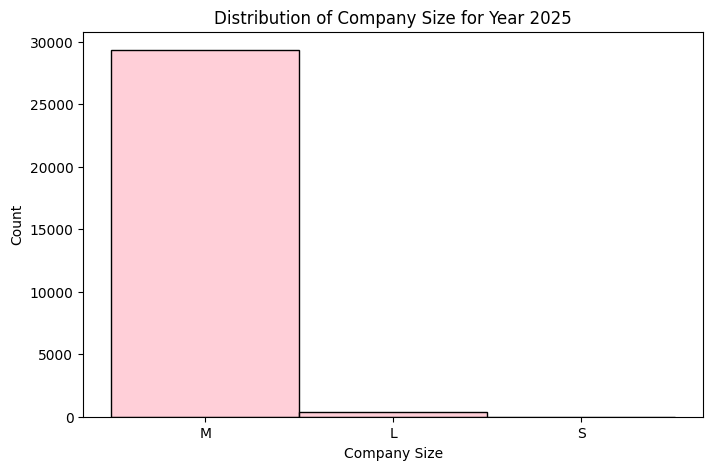

In [49]:
sa_2025 = sa[sa["work_year"] == 2025].copy()

if sa_2025.empty:
    print("No data available for work_year == 2025 to plot company_size.")
else:
    print("\nHistogram for work_year == 2025 only:")
    plt.figure(figsize=(8, 5))
    sns.histplot(sa_2025["company_size"], color='pink')
    plt.title("Distribution of Company Size for Year 2025")
    plt.xlabel("Company Size")
    plt.ylabel("Count")  
    plt.show()

## 2. Salary Distribution


Histogram for work_year == 2025 only:


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


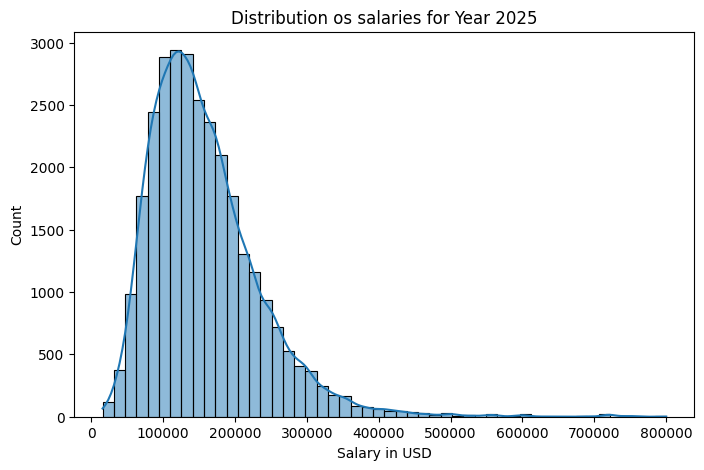

In [50]:
sa_2025 = sa[sa["work_year"] == 2025].copy()
if sa_2025.empty:
    print("No data available for work_year == 2025 to plot company_size.")
else:
    print("\nHistogram for work_year == 2025 only:")
    plt.figure(figsize=(8, 5))
    sns.histplot(sa_2025["salary_in_usd"], bins=50, kde=True)
    plt.title("Distribution os salaries for Year 2025")
    plt.xlabel("Salary in USD")
    plt.ylabel("Count")  
    plt.show()

## 3. Salary by Experience Level

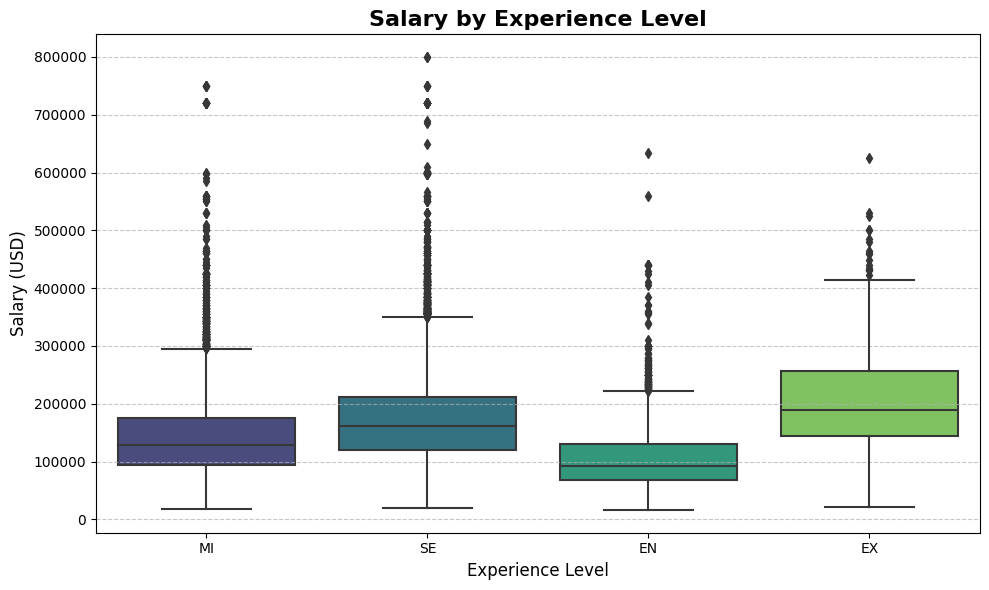

In [51]:
if sa_2025.empty:
    print("No data available in sa_2025 to plot.")
else:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=sa_2025, x="experience_level", y="salary_in_usd", palette="viridis")
    plt.title("Salary by Experience Level", fontsize=16, fontweight='bold')
    plt.xlabel("Experience Level", fontsize=12)
    plt.ylabel("Salary (USD)", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 4. Average Salary by Country

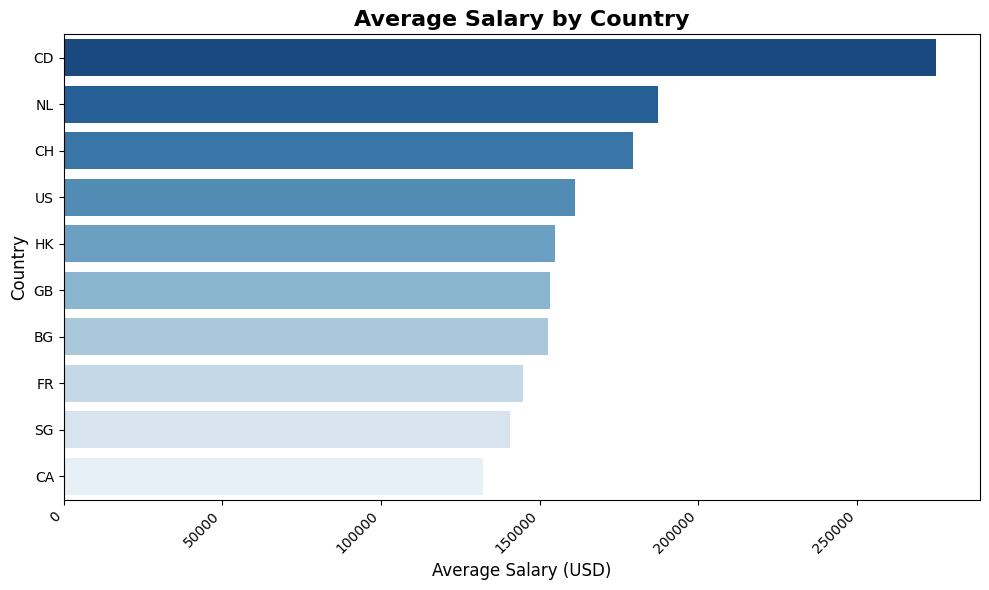

In [52]:
if sa_2025.empty:
    print("No data available in sa_2025 to plot.")
else:
    top_countries = sa_2025.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
    if top_countries.empty:
        print("No top countries found to plot after aggregation.")
    else:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_countries.values, y=top_countries.index, palette="Blues_r")
        plt.title("Average Salary by Country", fontsize=16, fontweight='bold')
        plt.xlabel("Average Salary (USD)", fontsize=12)
        plt.ylabel("Country", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [55]:
paid_summary(sa, "CD", top_n=10, ascending = False)
paid_summary(sa, "CD", top_n=10, ascending = True)


Top 10 highest paid job titles in USD for 2025 (Location: CD):
job_title
Engineer    275000.0

Top 10 lowest paid job titles in USD for 2025 (Location: CD):
job_title
Engineer    275000.0


In [56]:
paid_summary(sa, "NL", top_n=10, ascending = False)
paid_summary(sa, "NL", top_n=10, ascending = True)


Top 10 highest paid job titles in USD for 2025 (Location: NL):
job_title
Machine Learning Engineer    212500.0
Engineer                     197500.0
Manager                      141900.0

Top 10 lowest paid job titles in USD for 2025 (Location: NL):
job_title
Manager                      141900.0
Engineer                     197500.0
Machine Learning Engineer    212500.0


In [57]:
paid_summary(sa, "CH", top_n=10, ascending = False)
paid_summary(sa, "CH", top_n=10, ascending = True)


Top 10 highest paid job titles in USD for 2025 (Location: CH):
job_title
Quantitative Researcher    187500.0
Software Engineer          171500.0

Top 10 lowest paid job titles in USD for 2025 (Location: CH):
job_title
Software Engineer          171500.0
Quantitative Researcher    187500.0


## 5. Heatmap: Salary vs Experience vs Company Size

Cross-dimension analysis to find hot salary spots

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


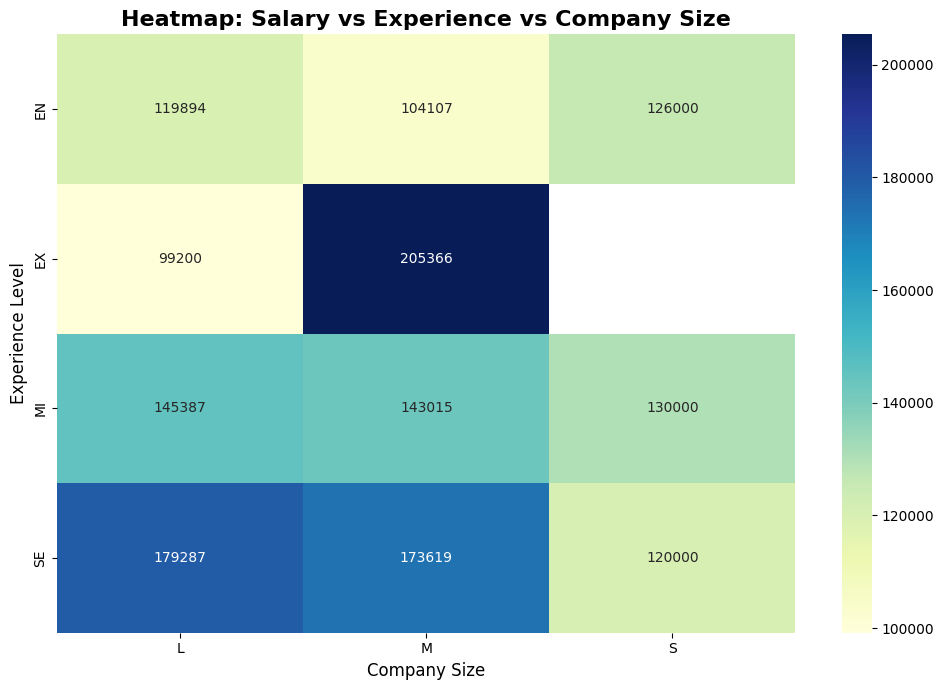

In [53]:
if sa_2025.empty:
    print("No data available in sa_2025 to create heatmap.")
else:
    pivot = sa_2025.pivot_table(index="experience_level", columns="company_size", values="salary_in_usd", aggfunc="mean")
    if pivot.empty:
        print("Pivot table is empty. No combinations of experience_level and company_size found with data.")
    else:
        plt.figure(figsize=(10, 7))
        sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
        plt.title("Heatmap: Salary vs Experience vs Company Size", fontsize=16, fontweight='bold')

        plt.xlabel("Company Size", fontsize=12)
        plt.ylabel("Experience Level", fontsize=12)
        plt.tight_layout()
        plt.show()

## 6. Bar Plot of Top 10 Highest Paid Job Titles

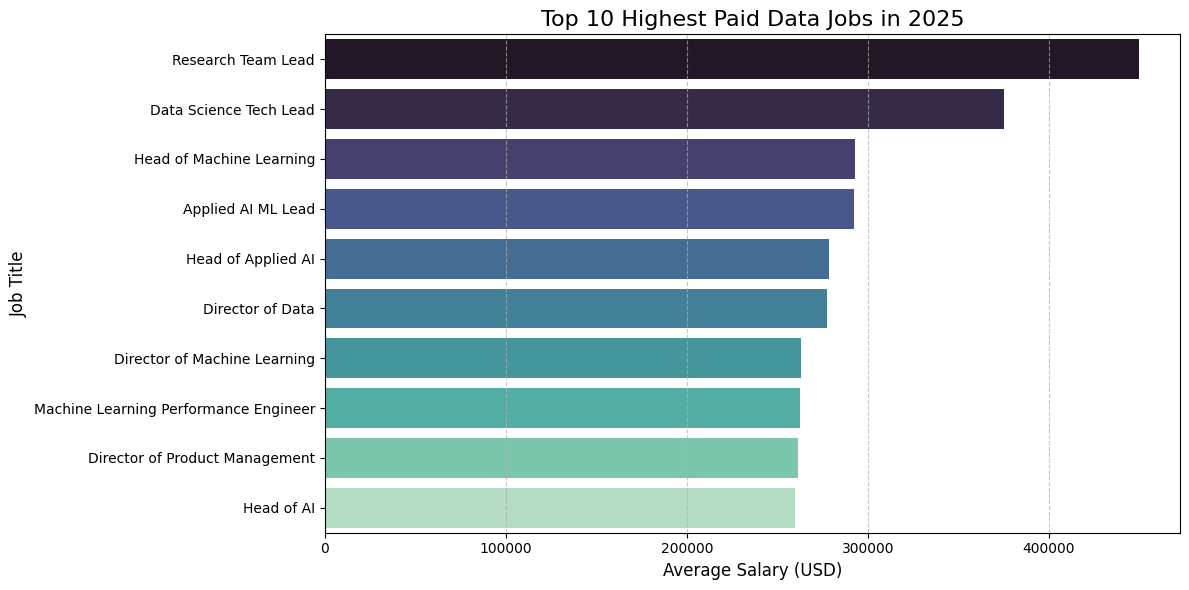

In [45]:
# Group by job title and get average salary
top_jobs = (sa.groupby("job_title")["salary_in_usd"]
              .mean()
              .sort_values(ascending=False)
              .head(10)
              .round(2))

plt.figure(figsize=(12, 6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="mako")

plt.title("Top 10 Highest Paid Data Jobs in 2025", fontsize=16)
plt.xlabel("Average Salary (USD)", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7. Remote Work & Salary

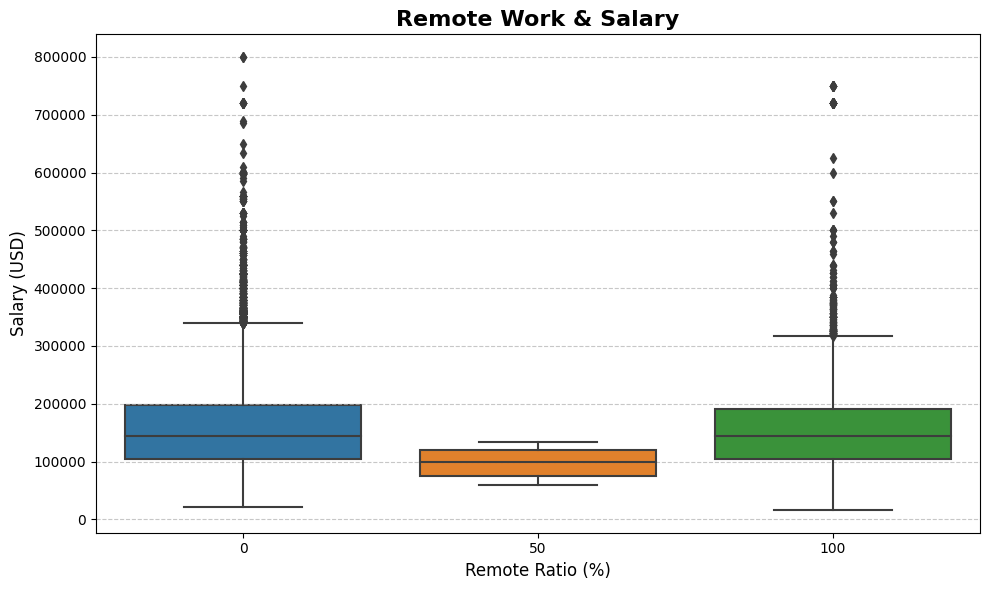

In [54]:
if sa_2025.empty:
    print("No data available in sa_2025 to plot.")
else:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=sa_2025, x="remote_ratio", y="salary_in_usd")
    plt.title("Remote Work & Salary", fontsize=16, fontweight='bold')
    plt.xlabel("Remote Ratio (%)", fontsize=12)
    plt.ylabel("Salary (USD)", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## 8.Salary Over Time by Experience Level

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

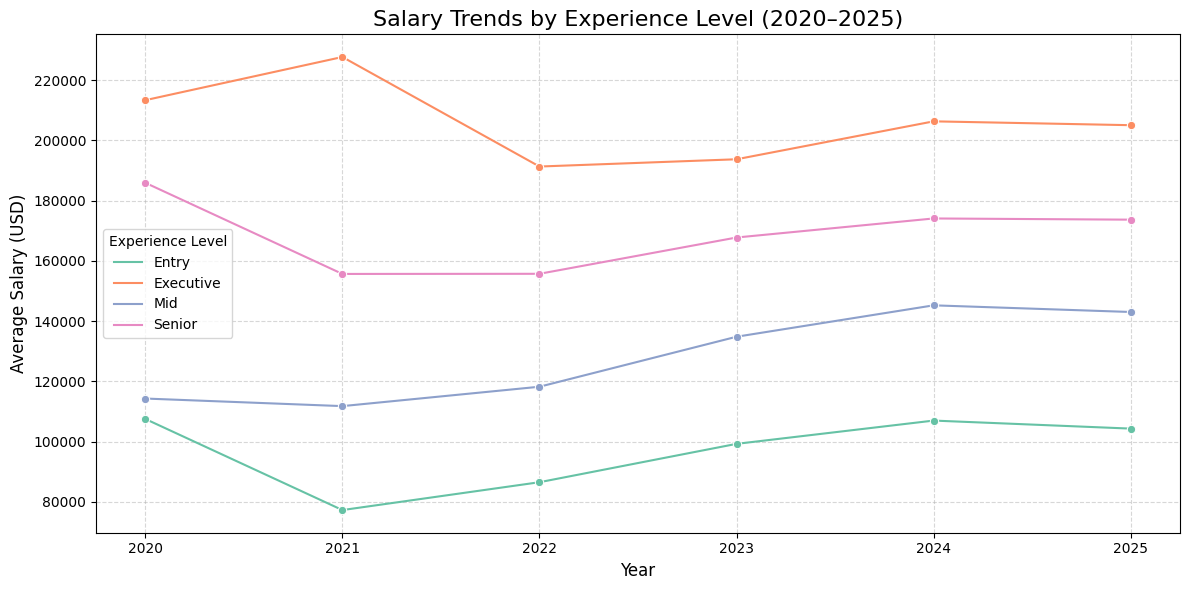

In [47]:
salary_over_time = (
    sa.groupby(["work_year", "experience_level"])["salary_in_usd"]
    .mean()
    .reset_index()
)

# map experience levels to full names for clarity
exp_map = {"EN": "Entry", "MI": "Mid", "SE": "Senior", "EX": "Executive"}
salary_over_time["experience_level"] = salary_over_time["experience_level"].map(exp_map)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=salary_over_time,
    x="work_year",
    y="salary_in_usd",
    hue="experience_level",
    marker="o",
    palette="Set2"
)

plt.title("Salary Trends by Experience Level (2020–2025)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Salary (USD)", fontsize=12)
plt.xticks(salary_over_time["work_year"].unique())
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

# Random Forest Regressor 🌲

In [42]:
# use a new variable for the ML
rfr = preprocess()
rfr.sample(5)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
84314,2024,SE,FT,Research Scientist,USD,340100,US,0,US,M
55677,2025,SE,FT,Analyst,USD,91800,US,0,US,M
72628,2024,EN,FT,Analytics Engineer,USD,220000,US,0,US,M
49524,2025,SE,FT,Software Engineer,USD,186000,US,0,US,M
25313,2025,SE,CT,Engineer,USD,170000,US,0,US,M


In [43]:
rfr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59299 entries, 0 to 133347
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           59299 non-null  int64 
 1   experience_level    59299 non-null  string
 2   employment_type     59299 non-null  string
 3   job_title           59299 non-null  string
 4   salary_currency     59299 non-null  string
 5   salary_in_usd       59299 non-null  int64 
 6   employee_residence  59299 non-null  string
 7   remote_ratio        59299 non-null  int64 
 8   company_location    59299 non-null  string
 9   company_size        59299 non-null  string
dtypes: int64(3), string(7)
memory usage: 5.0 MB


In [44]:
rfr.drop("salary_currency", axis=1, inplace=True)

## : Data Preprocessing for Modeling

**feature engineering**

In [45]:
# create a binary feature: 1 for fully remote jobs, 0 otherwise
rfr["is_fully_remote"] = (rfr["remote_ratio"] == 100).astype(int)

# help the model understand whether the employee is working from their home country.
rfr["is_domestic"] = (rfr["employee_residence"] == rfr["company_location"]).astype(int)

**One-Hot Encoding**

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Define the columns you want to encode
categorical_cols = ["experience_level", "employment_type", "company_size", "employee_residence", "company_location"]

# Set up the encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False).set_output(transform="pandas")

# Fit and transform the categorical columns
ohe_transformed = ohe.fit_transform(rfr[categorical_cols])

# Combine with original dataframe (drop the original categorical columns)
rfr = pd.concat([rfr.drop(columns=categorical_cols), ohe_transformed], axis=1)


In [47]:
rfr.sample(5)

,work_year,job_title,salary_in_usd,remote_ratio,is_fully_remote,is_domestic,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,...,company_location_SK,company_location_SV,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_ZA,company_location_ZM
86606,2024,Data Engineer,165000,0,0,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
34685,2025,Data Quality Engineer,75000,100,1,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
23976,2025,Engineer,234000,0,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5491,2025,Applied Scientist,139400,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
92684,2024,Engineer,78970,0,0,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Feature Encoding on the job title column**

In [48]:
frq = rfr.groupby("job_title").size()
print(frq.sort_values(ascending = False))

job_title
Data Scientist                    6047
Data Engineer                     5784
Data Analyst                      5243
Software Engineer                 4192
Engineer                          3683
                                  ... 
Cloud Data Architect                 1
Big Data Analyst                     1
Marketing Data Scientist             1
Marketing Data Analyst               1
Lead Machine Learning Engineer       1
Length: 355, dtype: int64


In [49]:
len(frq)

355

In [50]:
frq_dis = rfr.groupby("job_title").size() / len(frq)
frq_dis.sort_values(ascending = False)

job_title
Data Scientist                    17.033803
Data Engineer                     16.292958
Data Analyst                      14.769014
Software Engineer                 11.808451
Engineer                          10.374648
                                    ...    
Cloud Data Architect               0.002817
Big Data Analyst                   0.002817
Marketing Data Scientist           0.002817
Marketing Data Analyst             0.002817
Lead Machine Learning Engineer     0.002817
Length: 355, dtype: float64

In [51]:
# map the frequency back to the dataframe 
rfr["job_title_frq_enc"] = rfr["job_title"].map(frq_dis)
# drop the job title column
rfr.drop("job_title", axis = 1, inplace = True)

In [52]:
rfr.sample(5)

,work_year,salary_in_usd,remote_ratio,is_fully_remote,is_domestic,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,...,company_location_SV,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_ZA,company_location_ZM,job_title_frq_enc
66750,2024,170000,0,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.602817
76770,2024,144300,100,1,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.969014
71512,2024,290200,0,0,1,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.459155
3422,2025,155700,100,1,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.033803
130487,2023,340000,100,1,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.459155


**clipping outliers**

In [54]:
# Compute IQR boundaries
Q1 = rfr["salary_in_usd"].quantile(0.25)
Q3 = rfr["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the salary values
rfr["salary_in_usd"] = rfr["salary_in_usd"].clip(lower=lower_bound, upper=upper_bound)

# Create a new log-transformed salary column
rfr["log_salary"] = np.log1p(rfr["salary_in_usd"])  # log1p handles zero safely

# Split data
X = rfr.drop(["salary_in_usd", "log_salary"], axis=1)
y = rfr["log_salary"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=95)

## Data Modelling

In [55]:
# fit the data
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=13)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=13)

In [56]:
log_preds = model.predict(X_test)

# Reverses log1p()
salary_preds = np.expm1(log_preds)

# Reverses actual y_test to normal salaries
true_salary = np.expm1(y_test)      

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(true_salary, salary_preds))
print("MSE:", mean_squared_error(true_salary, salary_preds))
print("R2 Score:", r2_score(true_salary, salary_preds))

MAE: 46046.90432053728
MSE: 3582993254.090888
R2 Score: 0.23458506018448155


## Apply grid search to improve the model's performance

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create a base model
base_model = RandomForestRegressor(random_state=13)

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV with the model
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model from the grid
best_model = grid_search.best_estimator_

# Predict in log scale
y_pred = best_model.predict(X_test)

# Revert log scale to salary scale
salary_preds = np.expm1(y_pred)
true_salary = np.expm1(y_test)

In [61]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [62]:
# Evaluate on actual salary values
print("MAE:", mean_absolute_error(true_salary, salary_preds))
print("MSE:", mean_squared_error(true_salary, salary_preds))
print("R2 Score:", r2_score(true_salary, salary_preds))

MAE: 45800.059307400916
MSE: 3568481700.3369184
R2 Score: 0.23768508277887035


## Interpretation

MAE (Mean Absolute Error) is a metric that tells you, on average, how far off your model's predictions are from the actual values. It is expressed in the same unit as the target — in your case, US dollars.

MAE: 45,800
It means that, on average, the model’s predicted salary is $45,800 off (higher or lower) from the actual salary value.

This is helpful because it's easy to interpret: if you predicted a salary of 150,000 USD, you can expect it could realistically be somewhere in the range of 104,200 USD to 195,800 USD (± 45,800 USD) depending on other factors.